In [210]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def clean_data(data):
    '''Remplace les valeurs saturées (200) par des NaN (Not a Number)'''
    for i in range(len(data)):
        if data[i]==200:
            data[i]=np.nan
    return data
file=open("FILES.json","r")
json_data=json.load(file)
json1=json_data[0]
json2=json_data[1]
json3=json_data[2]
label1=json1['datasets']['label']
label2=json2['datasets']['label']
label3=json3['datasets']['label']
data1=json1['datasets']['data']
data2=json2['datasets']['data']
data3=json3['datasets']['data']
time_index=json1['labels']
humidity_dataframe = pd.DataFrame(
data={
    label1: data1,
    label2: data2,
    label3: data3,
    },
    index=time_index,
    dtype='float'
)
humidity_dataframe.index = pd.to_datetime(humidity_dataframe.index)
humidity_dataframe[label1]=clean_data(data1)
humidity_dataframe[label2]=clean_data(data2)
humidity_dataframe[label3]=clean_data(data3)

In [206]:
def save_plot_to_file(dataframe,title, labels, start_date, end_date, filename):
    '''Permet de transformer les données du dataframe en graphe'''
    index = humidity_dataframe[start_date:end_date].index
    j=0
    fig,axs=plt.subplots(3,sharex=True,sharey=True, figsize=(10,10))
    plt.rcParams['figure.dpi'] = 100
    fig.autofmt_xdate()
    plt.ylim(top=200) #Limite l'axe des y à 200 (valeur maximale)
    plt.ylim(bottom=0) #Limite l'axe des y à 0 (valeur minimale)
    axs[0].set_title(title)
    for i in labels :
        values = humidity_dataframe[start_date:end_date][i].values
        axs[j].margins(0) #Retire les marges
        axs[j].set_yticks([7.5,22.5,45,80,150])
        axs[j].set_yticklabels(['saturated','too wet','perfect','plan to water','dry'])
        axs[j].plot(index, values,label=i)
        axs[j].legend(loc='upper left') #Place la légende en haut à gauche
        axs[j].fill_between(index,15,0, facecolor='red',alpha = 0.2) #Colorie une partie du graphe
        axs[j].fill_between(index,30,15, facecolor='orange',alpha = 0.2) 
        axs[j].fill_between(index,60,30, facecolor='green',alpha = 0.2)
        axs[j].fill_between(index,100,60, facecolor='yellow',alpha = 0.2)
        axs[j].fill_between(index,200,100, facecolor='red',alpha = 0.2)
        j=j+1 

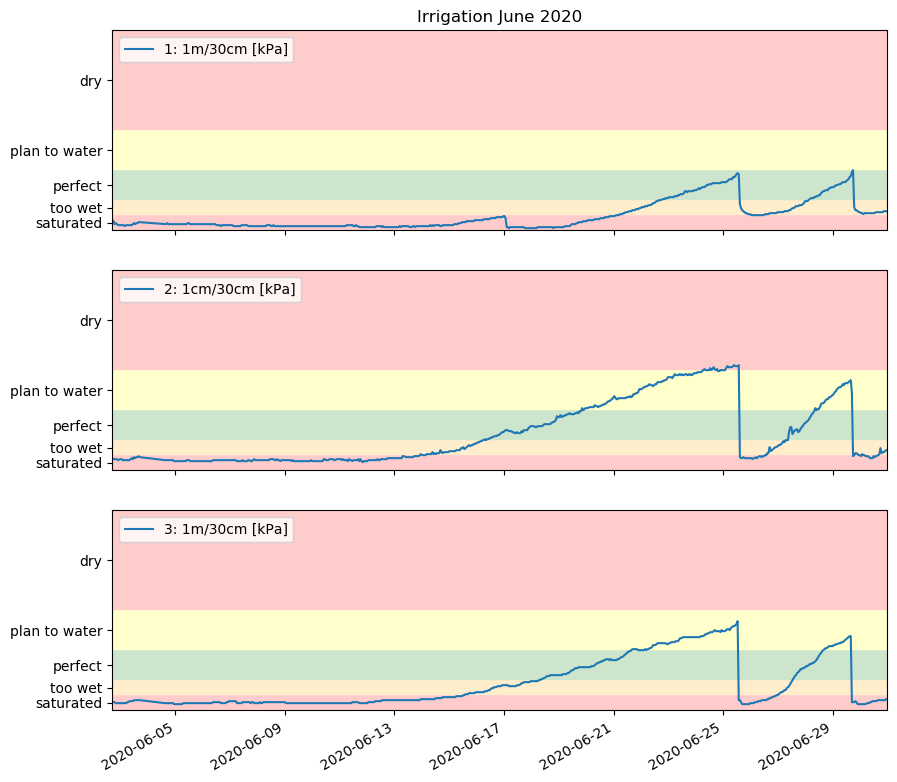

In [207]:
save_plot_to_file(humidity_dataframe,'Irrigation June 2020', [label1,label2,label3], '2020-06-01', '2020-06-30', 'FILES.json')

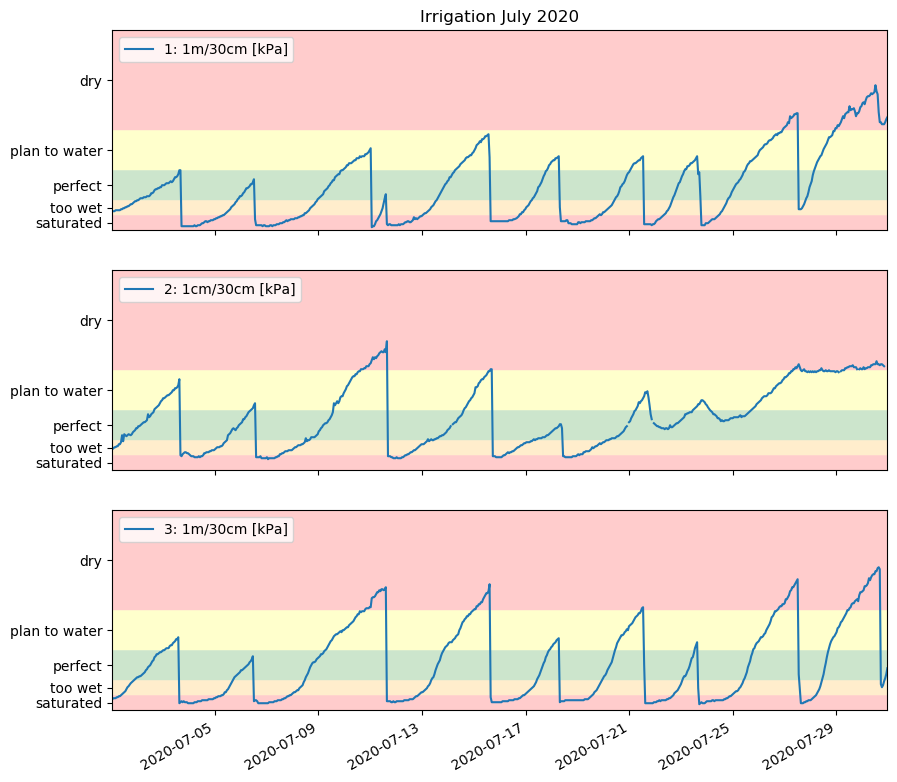

In [208]:
save_plot_to_file(humidity_dataframe,'Irrigation July 2020', [label1,label2,label3], '2020-07-01', '2020-07-30', 'FILES.json')

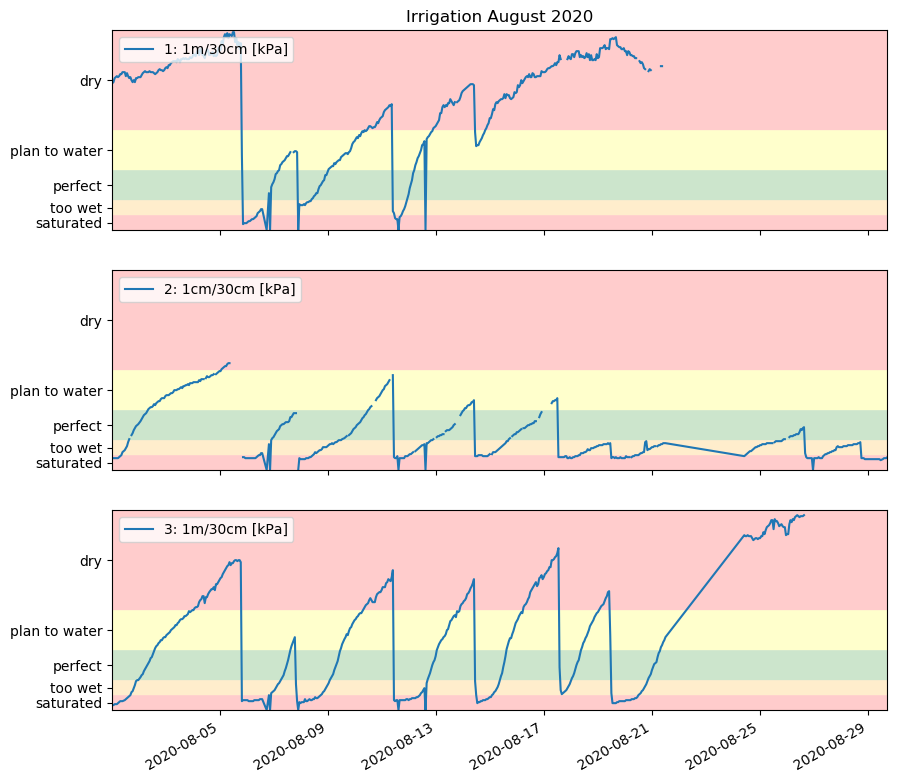

In [209]:
save_plot_to_file(humidity_dataframe,'Irrigation August 2020', [label1,label2,label3], '2020-08-01', '2020-08-30', 'FILES.json')